# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [3]:
strategies_list=['best1bin',
                 'best1exp',
                 'rand1exp',
                 'randtobest1exp',
                 'currenttobest1exp',
                 'best2exp',
                 'rand2exp',
                 'randtobest1bin',
                 'currenttobest1bin',
                 'best2bin',
                 'rand2bin',
                 'rand1bin']

In [4]:
interation_counter = {}

In [5]:
for stg in strategies_list:
    result = differential_evolution(ackley, bounds, seed=42, strategy=stg)
    print(f'', stg, result.message, 'nfev:', result.nfev, 'nit:', result.nit, 'x:', result.x)
    interation_counter[stg] = result.nit

 best1bin Optimization terminated successfully. nfev: 2793 nit: 90 x: [0. 0.]
 best1exp Optimization terminated successfully. nfev: 4503 nit: 147 x: [0. 0.]
 rand1exp Optimization terminated successfully. nfev: 7473 nit: 246 x: [0. 0.]
 randtobest1exp Optimization terminated successfully. nfev: 4773 nit: 156 x: [0. 0.]
 currenttobest1exp Maximum number of iterations has been exceeded. nfev: 30093 nit: 1000 x: [0. 0.]
 best2exp Optimization terminated successfully. nfev: 7413 nit: 244 x: [0. 0.]
 rand2exp Optimization terminated successfully. nfev: 10323 nit: 341 x: [0. 0.]
 randtobest1bin Optimization terminated successfully. nfev: 3123 nit: 101 x: [0. 0.]
 currenttobest1bin Maximum number of iterations has been exceeded. nfev: 30093 nit: 1000 x: [0. 0.]
 best2bin Optimization terminated successfully. nfev: 5073 nit: 166 x: [0. 0.]
 rand2bin Optimization terminated successfully. nfev: 7053 nit: 232 x: [0. 0.]
 rand1bin Optimization terminated successfully. nfev: 5133 nit: 168 x: [0. 0.

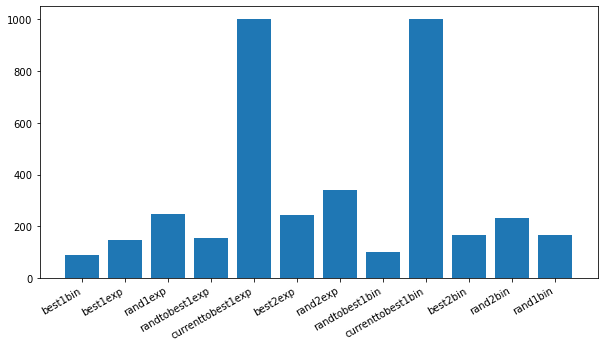

In [6]:
plt.figure(figsize=(10, 5))
plt.bar(interation_counter.keys(),
         interation_counter.values())
plt.xticks(rotation=30, ha="right")
plt.show()

In [7]:
popsize_range = range(1, 16)

In [8]:
interation_counter = {}

In [9]:
for pop in popsize_range:
    result = differential_evolution(ackley, bounds, seed=42, popsize=pop)
    print(f'', pop, result.message, 'nfev:', result.nfev, 'nit:', result.nit, 'x:', result.x)
    interation_counter[pop] = result.nit

 1 Optimization terminated successfully. nfev: 103 nit: 7 x: [-1.63444732e-08  9.52166535e-01]
 2 Optimization terminated successfully. nfev: 103 nit: 7 x: [-1.63444732e-08  9.52166535e-01]
 3 Optimization terminated successfully. nfev: 372 nit: 29 x: [-2.23261827e-04  7.50128262e-06]
 4 Optimization terminated successfully. nfev: 506 nit: 39 x: [ 4.99555835e-06 -1.10110403e-07]
 5 Optimization terminated successfully. nfev: 1073 nit: 100 x: [0. 0.]
 6 Optimization terminated successfully. nfev: 1263 nit: 99 x: [0. 0.]
 7 Optimization terminated successfully. nfev: 1295 nit: 87 x: [0. 0.]
 8 Optimization terminated successfully. nfev: 1631 nit: 97 x: [0. 0.]
 9 Optimization terminated successfully. nfev: 1899 nit: 101 x: [0. 0.]
 10 Optimization terminated successfully. nfev: 2023 nit: 97 x: [0. 0.]
 11 Optimization terminated successfully. nfev: 2043 nit: 89 x: [0. 0.]
 12 Optimization terminated successfully. nfev: 2391 nit: 96 x: [0. 0.]
 13 Optimization terminated successfully. nfe

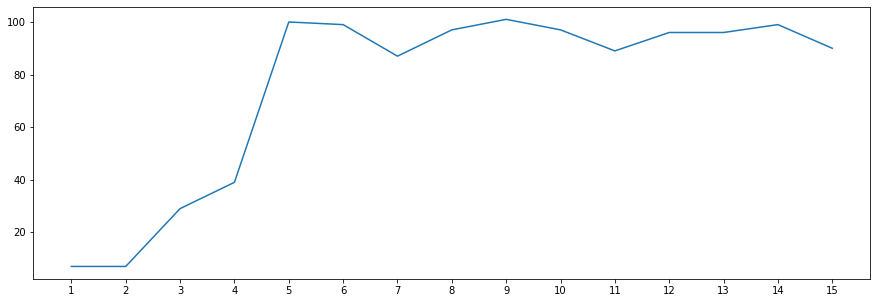

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(interation_counter.keys(),
         interation_counter.values())
plt.xticks(list(interation_counter.keys()))
plt.show()

In [11]:
mutation_range = np.arange(0, 2, 0.1).round(1)
mutation_range

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [12]:
interation_counter = {}

In [13]:
for mut in mutation_range:
    result = differential_evolution(ackley, bounds, seed=42, mutation=mut)
    print(f'', mut, result.message, 'nfev:', result.nfev, 'nit:', result.nit, 'x:', result.x)
    interation_counter[mut] = result.nit

 0.0 Optimization terminated successfully. nfev: 156 nit: 3 x: [ 0.96847763 -0.96847758]
 0.1 Optimization terminated successfully. nfev: 192 nit: 5 x: [0.96847769 0.96847738]
 0.2 Optimization terminated successfully. nfev: 933 nit: 28 x: [0. 0.]
 0.3 Optimization terminated successfully. nfev: 1233 nit: 38 x: [0. 0.]
 0.4 Optimization terminated successfully. nfev: 1503 nit: 47 x: [0. 0.]
 0.5 Optimization terminated successfully. nfev: 1803 nit: 57 x: [0. 0.]
 0.6 Optimization terminated successfully. nfev: 2373 nit: 76 x: [0. 0.]
 0.7 Optimization terminated successfully. nfev: 2823 nit: 91 x: [0. 0.]
 0.8 Optimization terminated successfully. nfev: 3213 nit: 104 x: [0. 0.]
 0.9 Optimization terminated successfully. nfev: 4203 nit: 137 x: [0. 0.]
 1.0 Optimization terminated successfully. nfev: 4233 nit: 138 x: [4.4408921e-14 8.8817842e-15]
 1.1 Optimization terminated successfully. nfev: 5703 nit: 187 x: [0. 0.]
 1.2 Optimization terminated successfully. nfev: 6063 nit: 199 x: [0.

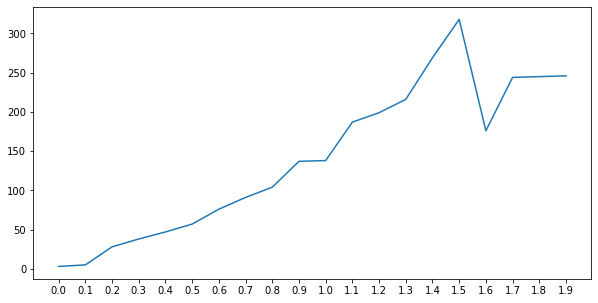

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(interation_counter.keys(),
         interation_counter.values())
plt.xticks(list(interation_counter.keys()))
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [15]:
from scipy.optimize import minimize

x0 = [0, 0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [16]:
methods = ['Nelder-Mead',
           'Powell',
           'CG',
           'BFGS',
           'L-BFGS-B',
           'TNC',
           'SLSQP',
           'trust-constr']

In [17]:
for method in methods:
    result_m = minimize(ackley, x0,  method=method)
    print(f'', method, result_m.message, 'nfev:', result_m.nfev, 'nit:', result_m.nit, 'x:', result_m.x)

 Nelder-Mead Optimization terminated successfully. nfev: 17 nit: 8 x: [0. 0.]
 Powell Optimization terminated successfully. nfev: 63 nit: 1 x: [0. 0.]
 CG Desired error not necessarily achieved due to precision loss. nfev: 165 nit: 0 x: [0. 0.]
 BFGS Desired error not necessarily achieved due to precision loss. nfev: 165 nit: 0 x: [0. 0.]
 L-BFGS-B ABNORMAL_TERMINATION_IN_LNSRCH nfev: 63 nit: 0 x: [0. 0.]
 TNC Linear search failed nfev: 18 nit: 0 x: [0. 0.]
 SLSQP Optimization terminated successfully nfev: 30 nit: 5 x: [-9.01466425e-11 -9.01469759e-11]
 trust-constr `xtol` termination condition is satisfied. nfev: 81 nit: 27 x: [0. 0.]


In [18]:
for method in methods:
    result_m = minimize(ackley, x0,  method=method, tol=0.001)
    print(f'', method, result_m.message, 'nfev:', result_m.nfev, 'nit:', result_m.nit, 'x:', result_m.x)

 Nelder-Mead Optimization terminated successfully. nfev: 3 nit: 1 x: [0. 0.]
 Powell Optimization terminated successfully. nfev: 63 nit: 1 x: [0. 0.]
 CG Desired error not necessarily achieved due to precision loss. nfev: 165 nit: 0 x: [0. 0.]
 BFGS Desired error not necessarily achieved due to precision loss. nfev: 165 nit: 0 x: [0. 0.]
 L-BFGS-B ABNORMAL_TERMINATION_IN_LNSRCH nfev: 63 nit: 0 x: [0. 0.]
 TNC Linear search failed nfev: 18 nit: 0 x: [0. 0.]
 SLSQP Optimization terminated successfully nfev: 14 nit: 1 x: [-5.92124683e-06 -5.92124683e-06]
 trust-constr `xtol` termination condition is satisfied. nfev: 30 nit: 10 x: [0. 0.]


In [19]:
result_m = minimize(ackley, x0,  method='SLSQP', tol=0.001, jac='3-point')
result_m

     fun: 4.440892098500626e-16
     jac: array([0., 0.])
 message: 'Optimization terminated successfully'
    nfev: 5
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0., 0.])